<a href="https://colab.research.google.com/github/antonFJohansson/spec_disc/blob/master/Spec_discussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is just to clarify what I meant when we talked today. I use a one-dimensional function to create the circles, the function is given by the generalized normal distribution (probably not optimal but it decays quickly and is relatively flat at the top so the circle is focused). The formula is given as can be found here
https://en.wikipedia.org/wiki/Generalized_normal_distribution
and here
https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.gennorm.html . The function is continuous but for certain values of $\beta$ maybe not differentiable, and I am unsure how the different deep learning frameworks treat the Gamma function, if they can even automatically differentiate it. But everything should be differentiable w.r.t the radius and the other parameters.

I do not know if this is what you wanted but it is what I tried to illustrate.

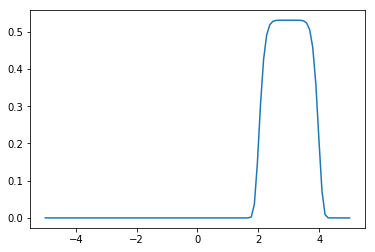

In [6]:



## A one dimensional example of what the function looks like
import numpy as np
from scipy.stats import gennorm


beta = 8
x_plot = np.linspace(-5,5,100)
mu = 3
sigma = 1
x_new = (x_plot - mu) / sigma


y_plot = gennorm.pdf(x_new, beta)
import matplotlib.pyplot as plt
plt.plot(x_plot, y_plot)











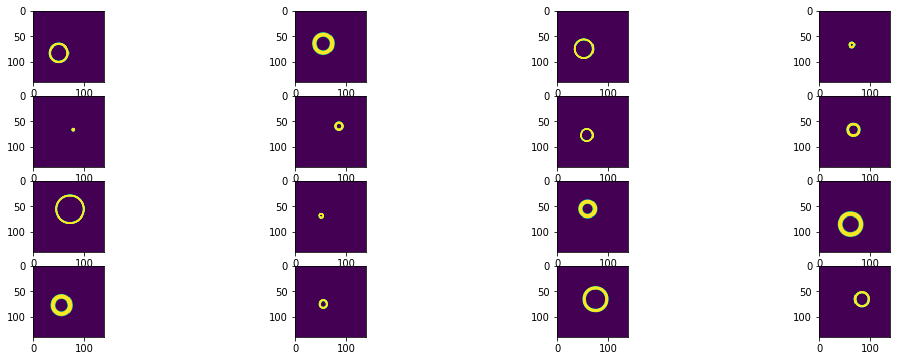

In [34]:
## A two dimensional example to show that it can create various circles with different radius and places at different points


x = np.arange(-7.0,7.0,0.1)
y = np.arange(-7.0,7.0,0.1)
X,Y = np.meshgrid(x, y) # grid of point


n_rows = 4
n_cols = 4
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols)


for row in range(n_rows):
  for col in range(n_cols):
    
    
    
    radius = np.random.uniform(0.1,3)
    width = np.random.uniform(0.2,0.5)
    translation_x = np.random.uniform(-2,2)
    translation_y = np.random.uniform(-2,2)

    #radius = 3
    #width = 0.2

    #translation_x = 1
    #translation_y = 1


    R = (np.sqrt((X- translation_x)**2 + (Y-translation_y)**2) - radius)/width
    Z = gennorm.pdf(R, beta)
    axs[row, col].imshow(Z)
    #plt.imshow(Z)




fig.set_size_inches(18, 6, forward=True)
plt.show()





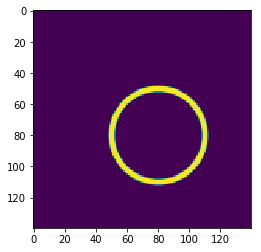

In [33]:


import torch
import torch.nn as nn

## A neural network layer that takes as input radius, width of the circle and translations
## Produces an image with a circle in it as output
class circle_layer(nn.Module):
  
  
  def __init__(self, num_nodex_x, num_nodex_y):
    super().__init__()
    self.x = np.arange(-10,10, num_nodex_x)
    self.y = np.arange(-10,10, num_nodex_y)
    self.grid_X, self.grid_Y = np.meshgrid(x, y)
    
  def forward(self, radius, width, translation_x, translation_y):
    
    R = (np.sqrt((self.grid_X- translation_x)**2 + (self.grid_Y-translation_y)**2) - radius)/width
    Z = gennorm.pdf(R, beta)
    return Z


a = circle_layer(100,100)
b = a(3,0.2,1,1)
plt.imshow(b)







I imagine that it is possible to match the circles width to circles in the training data in order to get some sort of specification that is similar to what it was trained on. And similarly with the height of the function to approximate 0-1 images for example.


Regarding the last point with the additive noise to distort images, I do not know what restrictions you have on the noise but I think it is always possible to achieve any distortion with additive noise (but it might be unrealistic to learn), since if $A$ is your original image, $B$ is the image after distortion, then you can just add the noise $B-A$ to $A$ to achieve the desired distortion. But I guess this example is not realistic in the sense since the transformation network has to learn $B$ which seems unfeasible. 

I have not dealt much with these things though so I do not know.

Anyway, hope all of this cleared up some things!